In [1]:
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
def scale_dataset(dataframes, oversample=False):
    x = dataframes[dataframes.columns[:-1]].values
    y = dataframes[dataframes.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(x)

    data = np.hstack((X, np.reshape(y, (-1, 1))))  # stacking all the arrays together like take the first array and take the second array and stack them together

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)  # this will take whatever is present in less quantity and make more of it i mean it will increase the data

    return data, X, y
    # x is two dimensional
    # y is one dimensional
    # we made our y a 2d array

In [3]:
df = pd.read_csv('magic04.data')

In [4]:
data, X, y = scale_dataset(df, oversample=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train = label_encoder.fit_transform(y_train)

In [6]:
print("Data type of y_train after conversion:", y_train.dtype)

Data type of y_train after conversion: int64


In [7]:
# Print unique values in y_train
print("Unique values in y_train:", np.unique(y_train))


Unique values in y_train: [0 1]


In [8]:
def plot_history(history):
  fig,(ax1,ax2) = plt.subplots(1,2)
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [9]:
# plot_history(history)

In [10]:
def train_model(X_train,y_train,num_nodes,dropout_prob,ir,batch_size,epocha):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(32,activation = 'relu',input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(32,activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(
      X_train,y_train,epochs = 100,batch_size = 32,validation_split = 0.2,verbose = 0
  )

  return nn_model,history

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

16 nodes, dropout 0, lr 0.01, batch_size 32


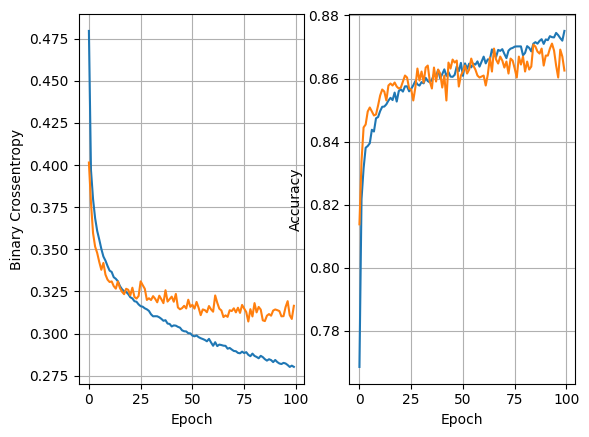

124/124 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8520
16 nodes, dropout 0, lr 0.01, batch_size 64


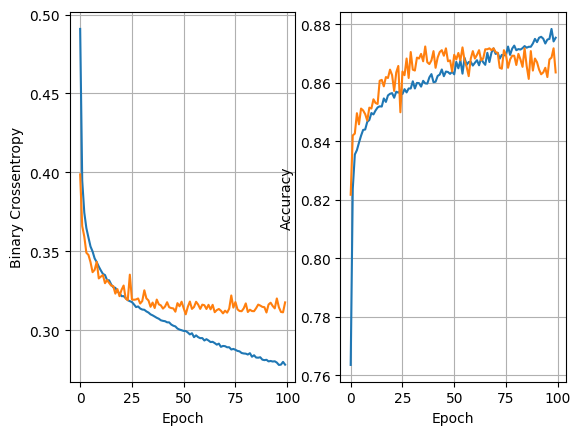

124/124 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8545
16 nodes, dropout 0, lr 0.01, batch_size 128


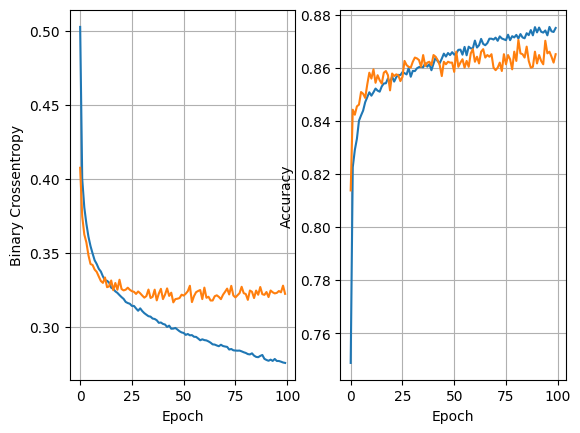

124/124 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8500
16 nodes, dropout 0, lr 0.005, batch_size 32


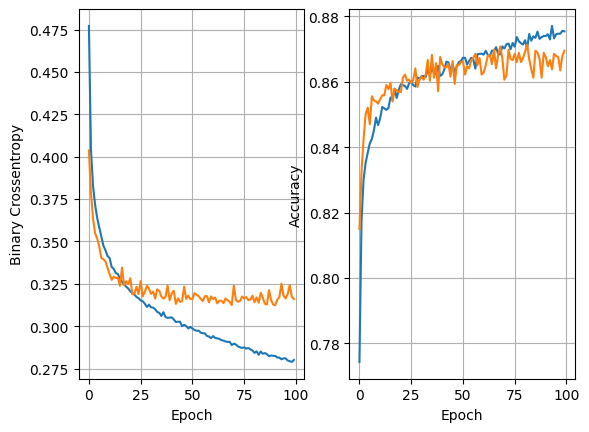

124/124 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8548
16 nodes, dropout 0, lr 0.005, batch_size 64


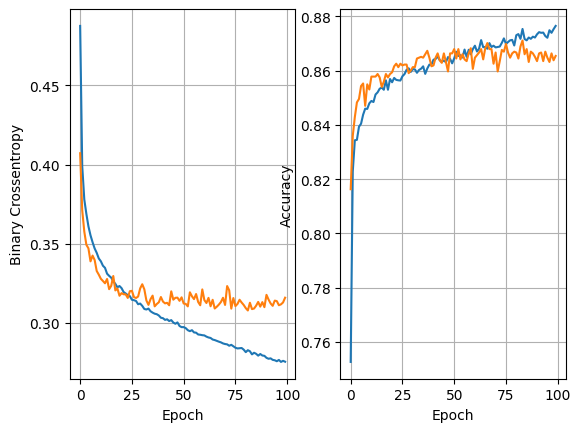

124/124 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8525
16 nodes, dropout 0, lr 0.005, batch_size 128


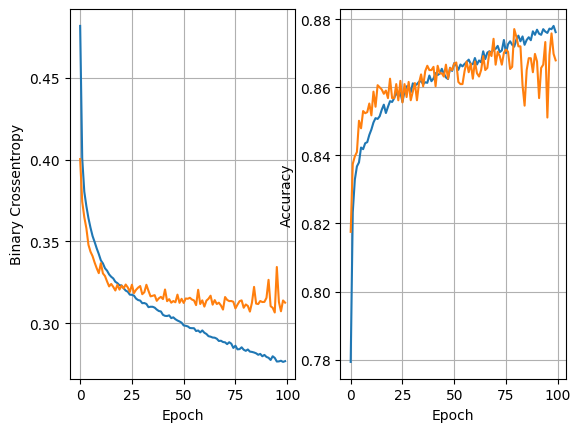

124/124 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8545
16 nodes, dropout 0, lr 0.001, batch_size 32


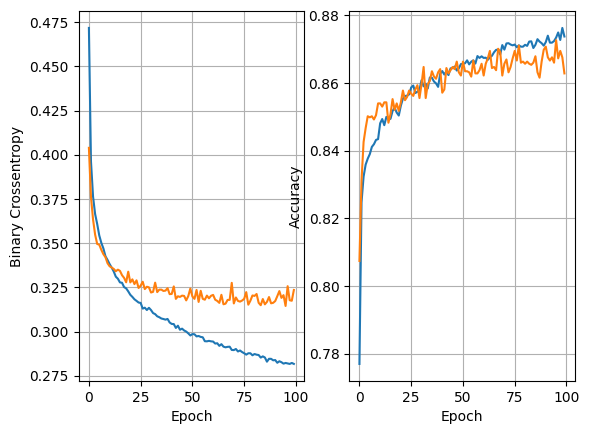

124/124 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.8515
16 nodes, dropout 0, lr 0.001, batch_size 64


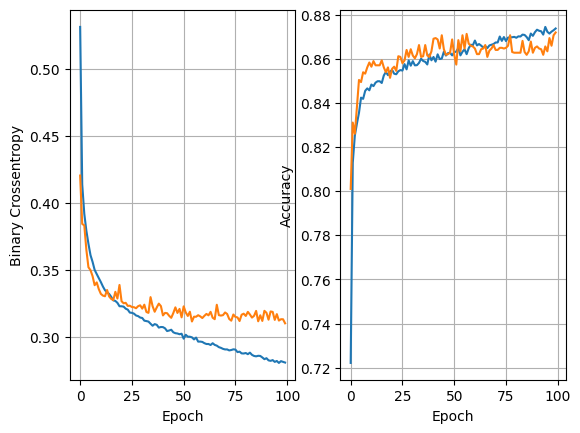

124/124 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8482
16 nodes, dropout 0, lr 0.001, batch_size 128


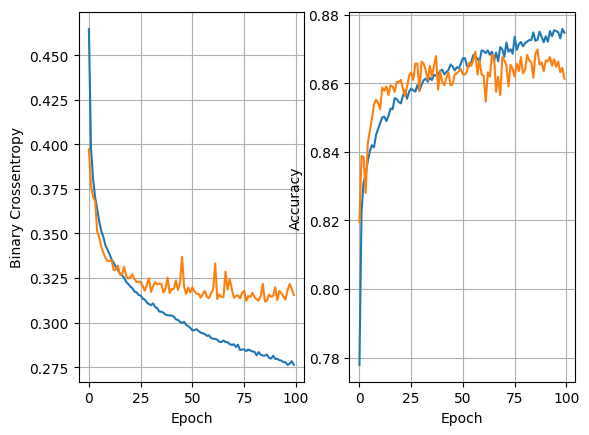

124/124 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8497
16 nodes, dropout 0.2, lr 0.01, batch_size 32


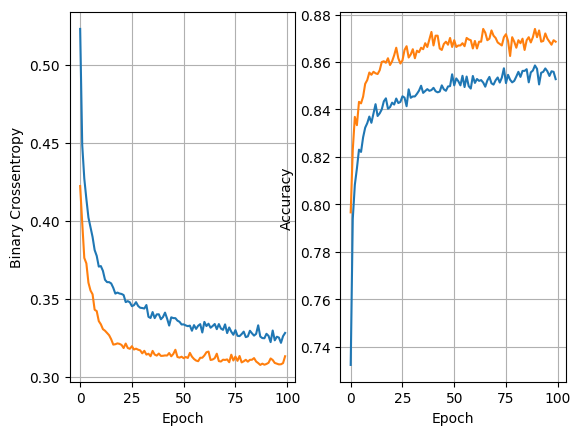

124/124 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8490
16 nodes, dropout 0.2, lr 0.01, batch_size 64


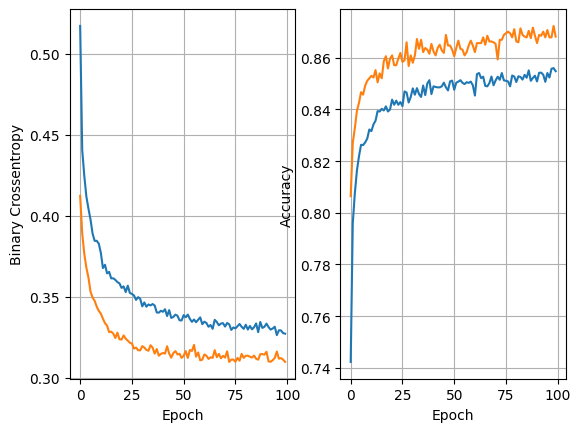

124/124 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8538
16 nodes, dropout 0.2, lr 0.01, batch_size 128


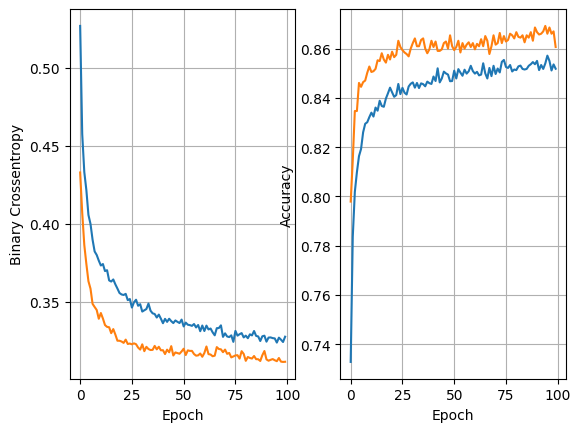

124/124 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8520
16 nodes, dropout 0.2, lr 0.005, batch_size 32


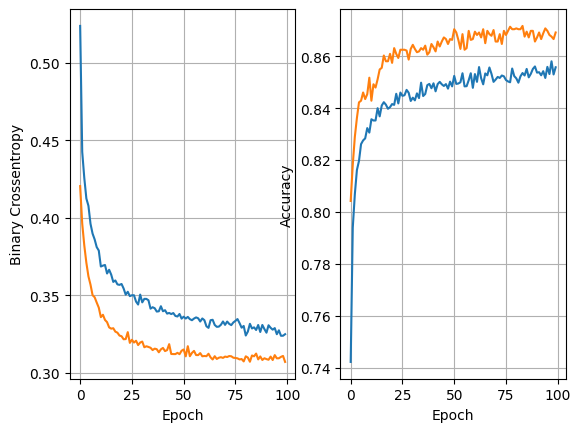

124/124 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8492
16 nodes, dropout 0.2, lr 0.005, batch_size 64


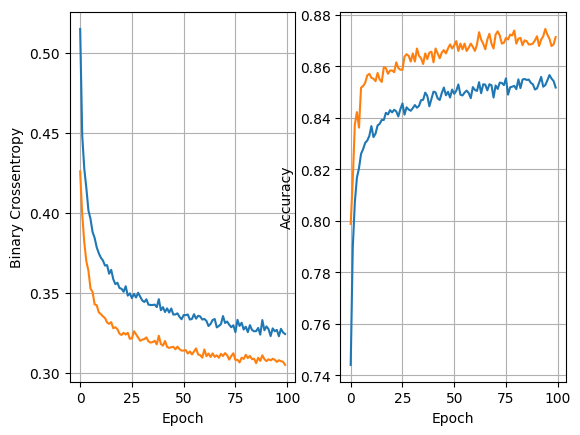

124/124 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8583
16 nodes, dropout 0.2, lr 0.005, batch_size 128


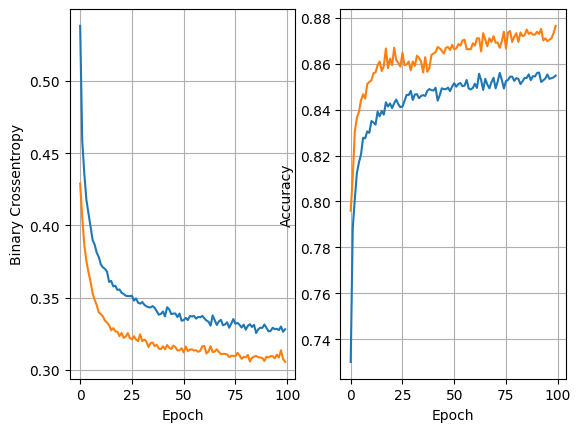

124/124 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8581
16 nodes, dropout 0.2, lr 0.001, batch_size 32


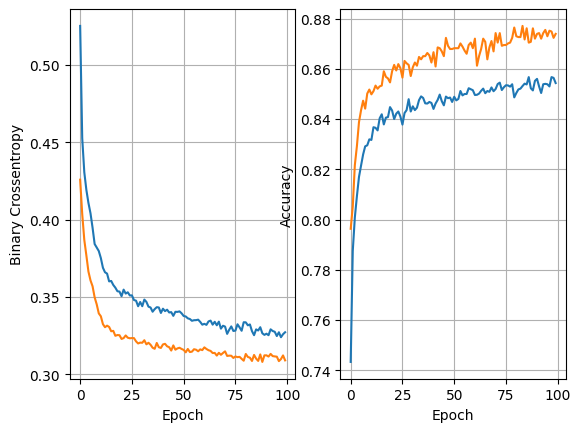

124/124 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8528
16 nodes, dropout 0.2, lr 0.001, batch_size 64


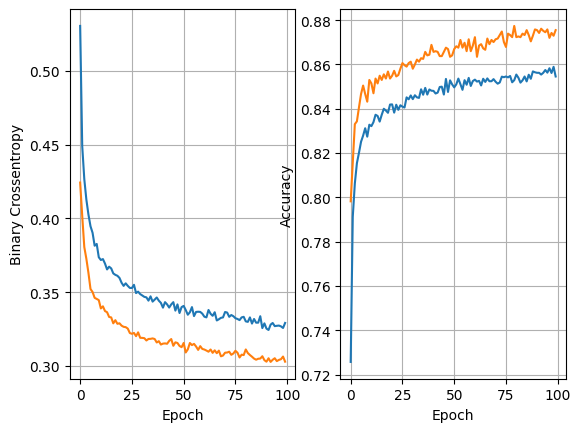

124/124 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8566
16 nodes, dropout 0.2, lr 0.001, batch_size 128


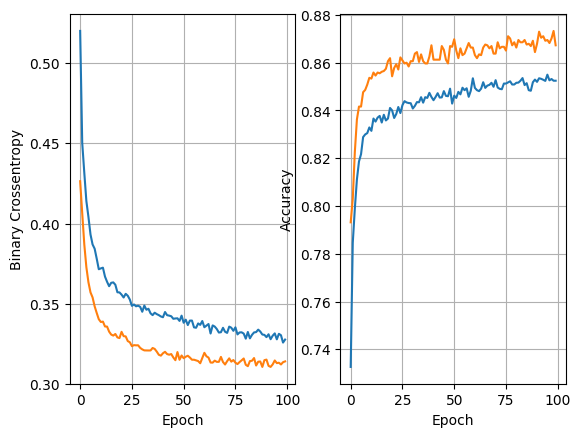

124/124 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8545
32 nodes, dropout 0, lr 0.01, batch_size 32


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [ ]:
# y_pred = least_loss_model,predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)
# y_pred

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

In [ ]:
print(classification_report(y_test,y_pred))